### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Recurrent Neural Networks 
* LSTM, GRU
* Autoencoders
* GAN
 


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*).
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 2]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 21 de Febrero 2020 (Fase I). Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Recurrentes en Texto
* 2 - Autoencoders en Fashion MNIST    
* 3 - GAN para MNIST.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

# 1 - Redes Recurrentes en texto

El analisis de texto y en general de lenguaje natural es una de las tareas desafiantes que los avances tanto del machine learning como de redes neuronales han logrado potenciar el los último años. La naturaleza inherentemente secuencial del texto y sus características similares a variables categóricas han inspirado muchos avances interesantes en el area. Para esta primera aproximación a procesamiento de secuencias, y en particular de texto, utilizaremos un dataset relativamente estandar, de texto anotado con categorias de entidades. Este dataset se encuentra disponible en el siguiente link https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus. 

Durante esta pregunta realizaremos dos tareas distintas, la de predicción del _tag_ para cada palabra de la secuencia (_many to many_) y la de predicción del siguiente caracter (_many to one_). 


#### 1.a El dataset

Investigue en la documentación del dataset cual es la tarea original para el cual fue propuesto, en particular cual es la variable que buscamos predecir, a qué se refiere esta misma y por qué es necesario utilizar técnicas avanzadas para resolver esta tarea (¿no bastaría con un diccionario? De un ejemplo en caso contrario). 

Cargue el conjunto de datos. Este conjunto de datos es bastante grande, por lo que como ven en el código propuesto, nos contentaremos con no considerar las lineas corruptas del registro.

Solo nos quedaremos con `word` y `lemma` de las variables regresoras, guardando `sentence_idx` para poder reconstruir las frases como unidad básica con la que trabajaremos. ¿Qué diferencia hay entre la palabra y su lemma? De ejemplos donde la diferencia sea significativa y explique en qué circunstancias preferiría una sobra la otra. 

Para la primera parte de estas preguntas, preferiremos los lemas pues buscaremos predecir el `tag` de la palabra.

In [1]:
#Code to use drive storage in colab notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
import pandas as pd
import os

#Reading the dataset, and dropping columns that won't be used
df = pd.read_csv(os.path.join("drive/My Drive/Colab Notebooks/","entity-annotated-corpus","ner.csv"), engine='python', error_bad_lines=False)
df = df.dropna()[['lemma','tag','word','sentence_idx']]

Skipping line 281837: Expected 25 fields in line 281837, saw 34


**La tarea original para este conjunto de datos es la clasificación de entidades, en específico, se busca asociar un *tag* a cada palabra de una oración, logrando identificar las identidades presentes en esta oración (sean entidades sustantivos en general). La variable que se busca predecir es el *tag* de cada palabra, y es este tag el que nos indica si la palabra de la oración corresponde a una entidad, y a que tipo de entidad. Es necesario utilizar técnicas avanzadas para esta tarea ya que muchas veces las palabras pueden ser o no entidades dependiendo del contexto en el que se expresen. Además, una palabra puede tener más de un significado dependiendo del contexto. Por ejemplo, la palabra *Park* puede ser usada como entidad para etiquetar algún tipo de recinto, o como verbo indicando la acción de estacionar (Un diccionario no podría diferenciar palabras en esta situación).**

**La diferencia entre lemma y word es que el lemma es una versión única asociada al concepto indiferente a conjugaciones y variaciones del lenguaje, por lo tanto es más general y representa un mayor grupo de palabras particulares. Desde un punto de vista linguístico, un lemma es peor que una palabra normal porque le quita riqueza y flexibilidad al lenguaje, pero en el procesamiento de texto son particularmente útiles para poder representar texto por medio de codificaciones más robustas y generales, ya que muchas palabras parecidas (conjugadas o derivadas) serán agrupadas dentro de un lemma específico, efectívamente reduciendo el tamaño del lenguaje usado. En casos en donde el contexto de la oración sea muy importante, o cuando los idiomas son más complejos (español y sus conjugaciones vs inglés y su ausencia de conjugaciones), los lemmas podrían no ser beneficiosos para el análisis.**

In [3]:
df.head()

,lemma,tag,word,sentence_idx
0,thousand,O,Thousands,1.0
1,of,O,of,1.0
2,demonstr,O,demonstrators,1.0
3,have,O,have,1.0
4,march,O,marched,1.0


#### 1.b Preprocesamiento

Para poder utilizar este conjunto de datos, debemos transformar nuestra tabla de palabras y sentencias, a una tabla donde cada entrada sea una sentencia, ademas codificando los distintos lemmas y tags como valores numericos. Esto pueden realizarlo con alguna de las utilidades de `keras` o `sklearn`, sin embargo en el código siguiente se propone un metodo solo usando python y `pandas`. Pueden utilizar el método que deseen. Note eso si que independiente la aproximación que utilice debe comenzar desde 1 para la codificación, pues el valor 0 lo reservaremos para representar la ausencia de palabras más adelante. 

Complete y explique que realiza cada linea del código.

In [28]:
import numpy as np

#First, a dictionary that assigns numbers to words is created, in the same way 
# as scikitlearn's LabelEncoder transforms words to numbers
lemma_to_code = {lemma:code+1 for code, lemma in enumerate(df.lemma.unique())}
tag_to_code = {tag:code+1 for code, tag in enumerate(df.tag.unique())}

#Then, the dictionary codification is applied to the entire lemma column
df['lemma'] = df.lemma.apply(lambda x: lemma_to_code[x])
df['tag'] = df.tag.apply(lambda x: tag_to_code[x])

#Finally, we join the dataset rows by to make every sentence as a sequence
dff = df.groupby("sentence_idx")[['lemma','tag']].agg(list).applymap(np.asarray)

dff.head()

,lemma,tag
sentence_idx,,
1.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, ..."
2.0,"[23, 2, 24, 25, 12, 10, 26, 27, 10, 9, 28, 29,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3.0,"[42, 5, 19, 10, 43, 2, 44, 8, 45, 46, 12, 47, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, ..."
4.0,"[49, 50, 10, 37, 2, 51, 52, 53, 54, 55, 56, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5.0,"[10, 9, 60, 61, 10, 62, 2, 10, 63, 64, 2, 65, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, ..."


**Primero, se crean dos diccionarios que asignan números a las palabras (uno para los lemmas y otro para los tags), de la misma forma que el LabelEncoder de ScikitLearn transforma palabras a números.
Luego, la codificación de estos diccionario es aplicada a las columnas lemma y tag del dataset.
Finalmente, unímos las filas de nuestro dataset codíficado según el valor de oración, para así obtener cada oración como una secuencia de palabras ya codificadas.**

#### 1.c Padding

Ahora que ya tenemos las sentencias codificadas y agrupadas, explore el tamaño de estas, en número de lemmas: ¿Son todas las sentencias de igual tamaño? ¿Le hace sentido esto? ¿Las redes que conoce pueden manajar ejemplos de distintos tamaños, y si pueden que problemas podría traer? ¿Estan las clases repartidas de manera equitativa?

En esta parte de la tarea, deben lograr que todas las secuencias de lemmas (y los tags correspondientes) queden del mismo largo, es decir realizar _padding_. El _padding_ debe realizarse con el valor 0, pueden escoger si realizarlo al comienzo de la secuencia o al final, expliquen su elección. Pueden utilizar la función `keras.preprocessing.sequence.pad_sequences` o escribir sus propios códigos. Elija un valor de `maxlen` que le parezca adecuado.

¿Opinan que es deseable utilizar el valor 0 como codificación de palabras que "no existen", o creen que es irrelevante por ejemplo que su valor sea 1?

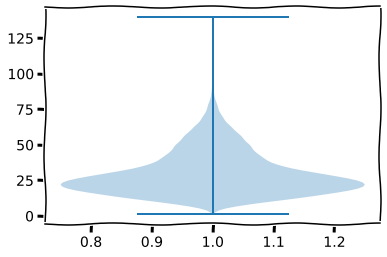

In [29]:
import matplotlib.pyplot as plt
plt.xkcd()

box = plt.violinplot([len(i) for i in dff['lemma']])
plt.show()

**Tal vez un poco obvio, pero las secuencias no son todas del mismo tamaño, debido a que no todas las oraciones son del mismo largo (misma cantidad de palabras). Hasta donde yo conozco, las redes suelen tener inputs de tamaño fijo, pero no me sorprendería descubrir que existe alguna que pueda recibir secuencias de largo variable.
La repartición de clases la veremos  más adelante en el testing, pero desde el futuro puedo decir que hay un alto desbalance de clases en lso tags, lo que hace que el obtener valores de accuracies altos sea algo mentiroso, ya que la clasificación realmente puede hacere de forma errónea. Es por esto que también usaremos otras métricas.
Luego de graficar este ViolinPlot, podemos ver la distribución empírica de los largos de las oraciones, y elegimos como largo máximo el valor 66. El padding se hace con ceros, lo cual sí puede ser relevante, ya que nuestros datos son números naturales (enteros positivos), y esto significa que el 0 es el valor más bajo que un dato podrá tener. Si se ve como enumeración no tiene tanta importancia.**

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len=66

X = pad_sequences(dff.lemma.values, maxlen=max_len, padding='post', 
                  truncating='post', value = 0)

y = pad_sequences(dff.tag.values, maxlen=max_len, padding='post',
                  truncating='post', value = 0)

from tensorflow.keras.utils import to_categorical

n_tags = df.tag.nunique() + 1
y = np.array([to_categorical(i, num_classes = n_tags) for i in y])

print(X.shape)
print(y.shape)

(35177, 66)
(35177, 66, 18)


#### 1.d Even more encodding and preprocessing

Para la primera tarea, buscaremos realizar la predicción del tag, la cual es una variable categórica. Por lo tanto, como ya sabemos de la tarea anterior, resulta conveniente tener los _targets_ en _one hot vector_. 

Además debemos separar ambos conjuntos (`x` e `y`) en los conjuntos de entrenamiento y validación. 

Realice esto con las herramientas y proporciones que estime convenientes. 

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_aux, y_train, y_aux = train_test_split(X, y, test_size=0.30) 
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(24623, 66) (24623, 66, 18)
(6966, 66) (6966, 66, 18)
(3588, 66) (3588, 66, 18)


#### 1.e Primera red recurrente

Ahora entrenaremos una primera red recurrente LSTM. Explique la particularidad de estas redes y por qué podría comportarse bien para este tipo de problemas. 

La tarea de esta red será procesar la secuencia de _lemmas_ y predecir su _tag_. ¿Cuáles son las dimensiones de nuestro input y de nuestro output?

Considerando que si bien los _lemmas_ estan representados como enteros, esta representación no tiene ninguna relación con el "significado" de estos. Por eso, es recomendable utilizar otra representación que mejor extraiga la naturaleza "categorica" de estos, sin embargo por la cantidad de ejemplos que tenemos, no resultaría practico utilizar _one hot vector_, pues las dimensiones explotarían. Para esto, utilizaremos una primera capa que realiza una transformación entrenable entre el espacio discreto de la representación original y un _embedding_ en $\mathbb{R}^d$ donde $d$ corresponde a la dimensión de nuestro espacio de llegada.

Utilice un _embedding_ de dmensión 100, luego agregue una capa LSTM con 128 unidades y finalmente la capa densa de salida. Compile y entrene el modelo por al menos 10 epochs. Grafique el proceso de entrenamiento y evalue el desempeño final considerando alguna métrica relevante (F1 score, matriz de confusión, etc), considerando la repartición de clases que observó en la pregunta c.

**La particularidad de una LSTM respecto de otra red recurrente es que posee más conexiones recurrentes que se implementan a través de las distintas gates (input gate, forget gate, output gate) y un hidden state por layer. Esto las transforma en un modelo mucho más complejo que el resto de RNNs, pero a su vez, suelen obtener muy buenos resultados al ser muy buenas al detectar relaciones temporales entre los datos.
En este entrenamiento, nuestra red recibe como input una secuencia de palabras, en este caso, de largo 66, y retorna una secuencia de tags del mismo largo, considerando 1 tag por cada palabra de la secuencia. Para el entrenamiento, las dimensiones son: X (24623 secuencias de largo 66) e y (24623 secuencias de tamaño 66x18 debido al one hot encoding).**

In [32]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

stopper = EarlyStopping(min_delta=0.005, patience=3, restore_best_weights=True)

embedding_dim = 100
n_lemmas = df.lemma.nunique()

inputs = Input(shape=(X_train.shape[1],))
embedd1 = Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len)(inputs)
lstm1 = LSTM(units=128,return_sequences=True)(embedd1)
outputs = Dense(n_tags, activation='softmax')(lstm1)

modelLSTM = Model(inputs=inputs, outputs=outputs)
modelLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historyLSTM = modelLSTM.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[stopper])

Train on 24623 samples, validate on 3588 samples
Epoch 1/10
24623/24623 [==============================] - 26s 1ms/sample - loss: 0.6408 - acc: 0.8757 - val_loss: 0.3017 - val_acc: 0.9295
Epoch 2/10
24623/24623 [==============================] - 24s 957us/sample - loss: 0.2059 - acc: 0.9431 - val_loss: 0.1593 - val_acc: 0.9565
Epoch 3/10
24623/24623 [==============================] - 23s 945us/sample - loss: 0.1185 - acc: 0.9695 - val_loss: 0.1050 - val_acc: 0.9723
Epoch 4/10
24623/24623 [==============================] - 23s 939us/sample - loss: 0.0833 - acc: 0.9778 - val_loss: 0.0885 - val_acc: 0.9753
Epoch 5/10
24623/24623 [==============================] - 23s 954us/sample - loss: 0.0692 - acc: 0.9805 - val_loss: 0.0824 - val_acc: 0.9763
Epoch 6/10
24623/24623 [==============================] - 23s 945us/sample - loss: 0.0612 - acc: 0.9819 - val_loss: 0.0794 - val_acc: 0.9770
Epoch 7/10
24623/24623 [==============================] - 23s 954us/sample - loss: 0.0561 - acc: 0.9830 - v

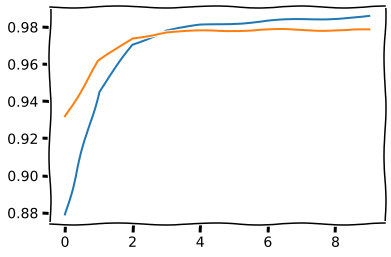

In [9]:
plt.plot(historyLSTM.history["acc"])
plt.plot(historyLSTM.history["val_acc"])
plt.show()

Shapes iniciales: (6966, 66, 18) (6966, 66, 18)
Shapes agrupados: (459756, 18) (459756, 18)
Shapes no categoricos: (459756,) (459756,)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         pad       1.00      1.00      1.00    253772
           O       0.98      0.99      0.98    174267
       B-geo       0.79      0.85      0.82      7489
       B-gpe       0.92      0.92      0.92      3161
       B-per       0.80      0.73      0.76      3306
       I-geo       0.73      0.73      0.73      1476
       B-org       0.66      0.48      0.56      3856
       I-org       0.64      0.56      0.60      3238
       B-tim       0.88      0.81      0.85      4091
       B-art       0.40      0.02      0.04       109
       I-art       0.00      0.00      0.00        95
       I-per       0.85      0.81      0.83      3344
       I-gpe       1.00      0.17      0.29        60
       I-tim       0.62      0.67      0.65      1304
       B-nat       0.92      0.22      0.35        55
       B-eve       0.64      0.22      0.33        63
       I-eve       0.00      0.00      0.00        59
       I-nat       0.00    

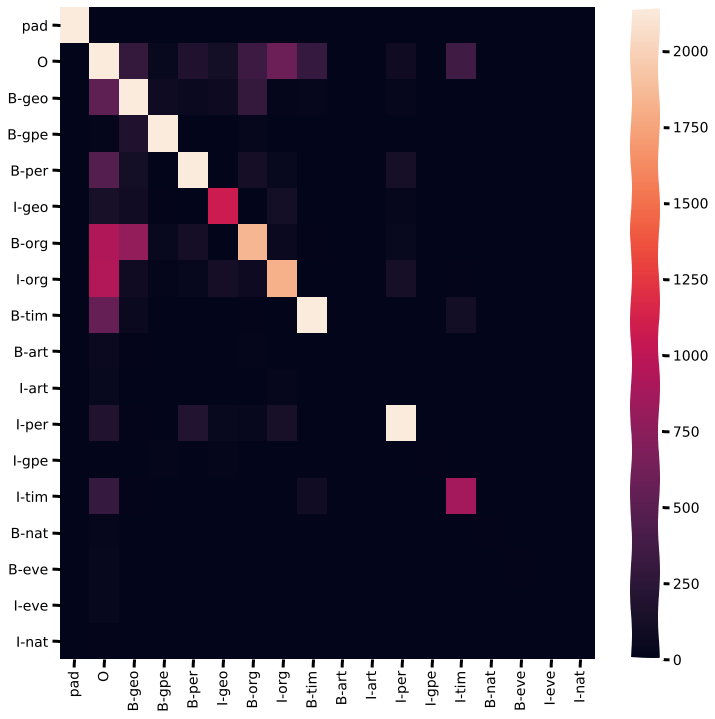

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_predLSTM = modelLSTM.predict(X_test)

print("Shapes iniciales:", y_predLSTM.shape, y_test.shape)

y_true = y_test.reshape((y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
y_predLSTM = y_predLSTM.reshape((y_predLSTM.shape[0]*y_predLSTM.shape[1],y_predLSTM.shape[2]))

print("Shapes agrupados:", y_predLSTM.shape, y_true.shape)

y_true = np.array([np.argmax(i) for i in y_true])
y_predLSTM = np.array([np.argmax(i) for i in y_predLSTM])

print("Shapes no categoricos:", y_predLSTM.shape, y_true.shape)

labels = ['pad'] + list(tag_to_code.keys())

print(classification_report(y_true, y_predLSTM, target_names=labels))

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_true, y_predLSTM), robust=True, xticklabels=labels, yticklabels=labels)
plt.show()

**Podemos obtener varias conclusiones relevantes de este primer entrenamiento:
Primero que nada, al hacer el clasification report, podemos ver el support de cada clase, que es la cantidad de datos que tiene cada clase en el conjunto de test. Se ve claramente la disparidad entre la cantidad de datos por clases. Esta fue una de las razones por las que se decidió no escoger un padding tan grande, ya que la clase del padding ya incluye una gran cantidad de datos y no necesita más aun.
Para las métricas, es preferible considerar las señaladas en macro avg, ya que nos reflejan la posibilidad de mejorar en el análisis tomando en cuenta el problema del desbalance de clases. 
Es tanto este problema que para poder graficar una mátriz de confusión legible se debe utilizar el argumento robust=True, que considera los valores por sus cuartiles y así evita dispersiones altas.**

#### 1.f Comparación con otras aproximaciones. 

Ahora entrenaremos dos redes más para comparar los desempeños de la red recurrente. Para esto entrenaremos una red convolucional 1-dimensional y una red densa. Discuta las diferencias entre ambas redes y la red recurrente, y cual cree a priori se adecua mejor a la naturaleza del problema. 

Defina y entrene luego las redes con la misma primera capa de encodding y las siguientes configuraciones:
* Convolucional: 2 capas conv1d con 128 filtros y kernel de tamaño 5
* Densa: 2 capas densas de 128 unidades

Compare los desempeños de las 3 redes en el problema su métrica preferida

**Todas las redes son capaces de procesar el input y entregar una secuencia de etiquetas, la diferencia radica en como cada modelo trabaja con los datos para hacer este proceso. Una red densa normal intenta combinar los datos mediante transformaciones lineales (no se usó ninguna activación en específico) para así derivar una función explícita como hipótesis, mientras que una red convolucional 1D busca "filtrar" la señal en busca de patrones, los cuales están determinados por los distintos filtros. Una RNN busca reconocer relaciones temporales en los datos mediante el uso de conexiones recurrentes. Si vemos estas 3 formas de operar de las distintas redes, a priori yo sólo me atrevería a argumentar que una red densa normal no es lo mejor para el problema, ya que no cubre ninguna arista interesante o particular del problema. Mientras que una red convolucional 1D, si bien suele ser no usada en favor de la LSTM, propone un principio teórico interesante que da muy bueno resultados en imágenes.**

In [11]:
from tensorflow.keras.layers import Conv1D

inputs = Input(shape=(X_train.shape[1],))
embedd1 = Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len)(inputs)
conv1 = Conv1D(128, 5, activation='relu', padding='same')(embedd1)
outputs = Dense(n_tags, activation='softmax')(conv1)

modelCONV1D = Model(inputs=inputs, outputs=outputs)
modelCONV1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historyCONV1D = modelCONV1D.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[stopper])

inputs = Input(shape=(X_train.shape[1],))
embedd1 = Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len)(inputs)
dense1 = Dense(128)(embedd1)
dense2 = Dense(128)(dense1)
outputs = Dense(n_tags, activation='softmax')(dense2)

modelDENSE2 = Model(inputs=inputs, outputs=outputs)
modelDENSE2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historyDENSE2 = modelDENSE2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[stopper])

Train on 24623 samples, validate on 3588 samples
Epoch 1/10
24623/24623 [==============================] - 8s 328us/sample - loss: 0.5144 - acc: 0.9229 - val_loss: 0.1367 - val_acc: 0.9651
Epoch 2/10
24623/24623 [==============================] - 1s 54us/sample - loss: 0.0914 - acc: 0.9761 - val_loss: 0.0701 - val_acc: 0.9798
Epoch 3/10
24623/24623 [==============================] - 1s 58us/sample - loss: 0.0565 - acc: 0.9836 - val_loss: 0.0627 - val_acc: 0.9814
Epoch 4/10
24623/24623 [==============================] - 1s 55us/sample - loss: 0.0454 - acc: 0.9863 - val_loss: 0.0617 - val_acc: 0.9817
Epoch 5/10
24623/24623 [==============================] - 1s 57us/sample - loss: 0.0392 - acc: 0.9879 - val_loss: 0.0623 - val_acc: 0.9819
Epoch 6/10
24623/24623 [==============================] - 1s 58us/sample - loss: 0.0348 - acc: 0.9890 - val_loss: 0.0630 - val_acc: 0.9817
Epoch 7/10
24623/24623 [==============================] - 1s 59us/sample - loss: 0.0314 - acc: 0.9899 - val_loss: 0.

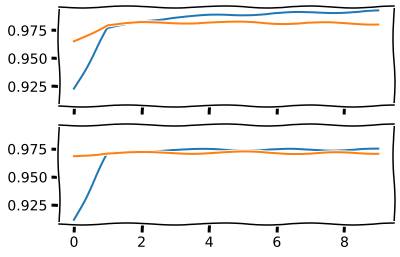

In [12]:
fig, axs = plt.subplots(2, sharex=True, sharey=True)
axs[0].plot(historyCONV1D.history["acc"])
axs[0].plot(historyCONV1D.history["val_acc"])
axs[1].plot(historyDENSE2.history["acc"])
axs[1].plot(historyDENSE2.history["val_acc"])
plt.show()

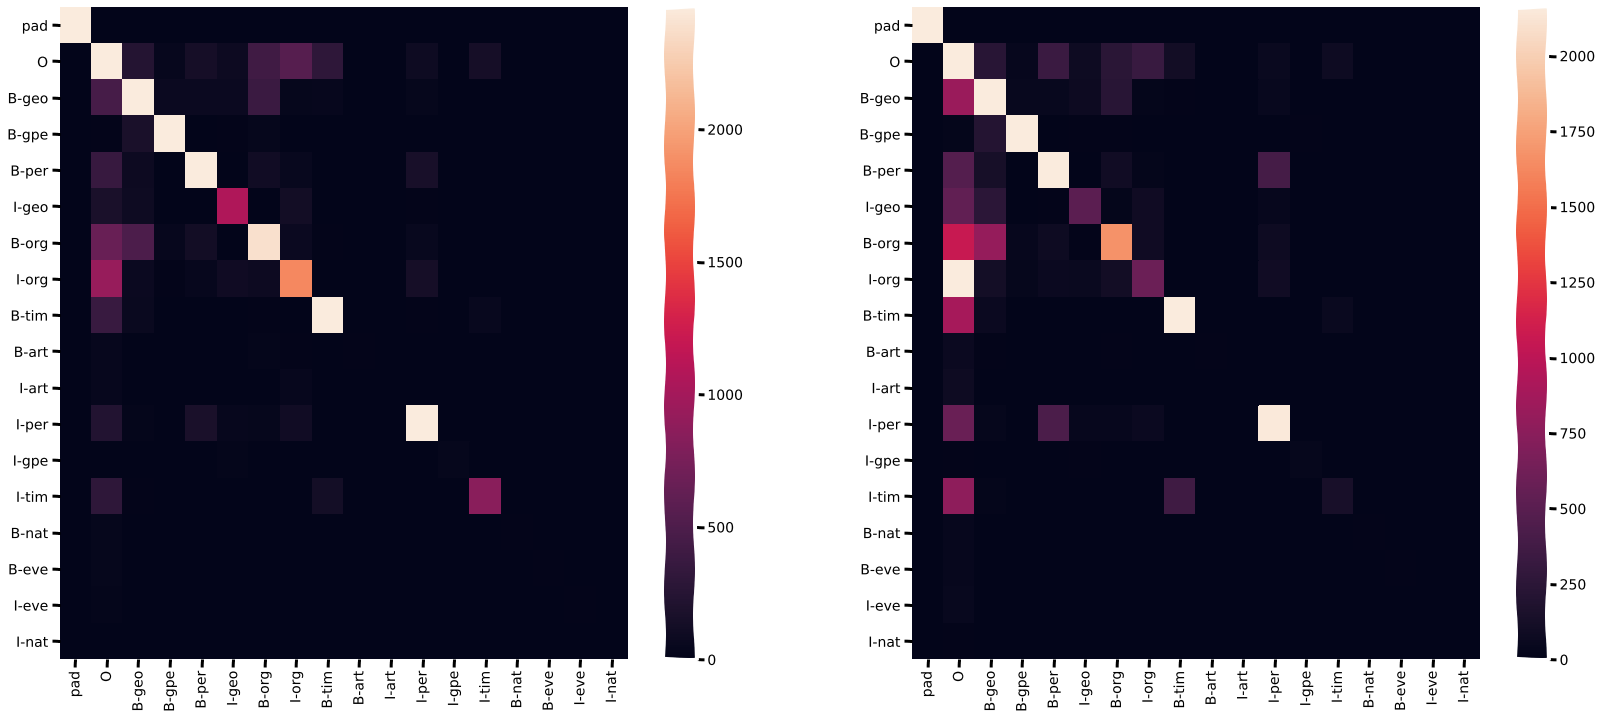

In [13]:
y_predCONV1D = modelCONV1D.predict(X_test)
y_predCONV1D = y_predCONV1D.reshape((y_predCONV1D.shape[0]*y_predCONV1D.shape[1],y_predCONV1D.shape[2]))
y_predCONV1D = np.array([np.argmax(i) for i in y_predCONV1D])

y_predDENSE2 = modelDENSE2.predict(X_test)
y_predDENSE2 = y_predDENSE2.reshape((y_predDENSE2.shape[0]*y_predDENSE2.shape[1],y_predDENSE2.shape[2]))
y_predDENSE2 = np.array([np.argmax(i) for i in y_predDENSE2])

plt.figure(figsize=(28,12))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_true, y_predCONV1D), robust=True, xticklabels=labels, yticklabels=labels)
plt.subplot(122)
sns.heatmap(confusion_matrix(y_true, y_predDENSE2), robust=True, xticklabels=labels, yticklabels=labels)
plt.show()

**De las matrices de confusión podemos ver que la red con covolución 1D tiene mejor desempeño que la red Densa, incluyendo el hecho que la red convolucional tenía 1 capa y no 2 como decía el enunciado. Respecto del resultado de esta con la LSTM, no se logra ver una diferencia significativa entre un modelo y otro, ambos tienen resultados muy similares.**

#### 1.g Red más profunda o bidireccional

Una pregunta natural que surge es saber que ocurre al aumentar la profundidad de la red, o por ejemplo porqué solo se recorre el _input_ en la dirección original. Considerando el tiempo acotado de este semestre, pueden elegir realizar una de las dos exploraciones solamente. 

* Profundidad: Entrene un par de redes con más capas LSTM y grafique como se comporta el desempeño a medida se aumenta la profundidad
* Bidireccional: Varie la cantidad de unidades (a lo menos 4 valores distintos) de la capa LSTM y compare con la red utilizando capas LSTM bidireccionales (como muestra el código). Comente sobre el número de parámetros en ambos casos.

In [14]:
from tensorflow.keras.layers import Bidirectional

n_units = [32, 64, 128, 256]
models = {}
histories = {}

for n in n_units:
  print("Entrenando red LSTM unidireccional con {} unidades".format(n))
  inputs = Input(shape=(X_train.shape[1],), name='input_uni_{}'.format(n))
  embedd1 = Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len, name='emb_uni_{}'.format(n))(inputs)
  lstm1 = LSTM(units=n,return_sequences=True, name='lstm_uni_{}'.format(n))(embedd1)
  outputs = Dense(n_tags, activation='softmax', name='out_uni_{}'.format(n))(lstm1)

  models['uni_{}'.format(n)] = Model(inputs=inputs, outputs=outputs)
  models['uni_{}'.format(n)].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  histories['uni_{}'.format(n)] = models['uni_{}'.format(n)].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[stopper])

  print("Entrenando red LSTM bidireccional con {} unidades".format(n))
  inputs = Input(shape=(X_train.shape[1],))
  embedd1 = Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len)(inputs)
  lstm1 = Bidirectional(LSTM(units=n,return_sequences=True))(embedd1)
  outputs = Dense(n_tags, activation='softmax')(lstm1)

  models['bi_{}'.format(n)] = Model(inputs=inputs, outputs=outputs)
  models['bi_{}'.format(n)].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  histories['bi_{}'.format(n)] = models['bi_{}'.format(n)].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[stopper])


Entrenando red LSTM unidireccional con 32 unidades
Train on 24623 samples, validate on 3588 samples
Epoch 1/10
24623/24623 [==============================] - 24s 964us/sample - loss: 0.7948 - acc: 0.8776 - val_loss: 0.3178 - val_acc: 0.9317
Epoch 2/10
24623/24623 [==============================] - 23s 929us/sample - loss: 0.2553 - acc: 0.9344 - val_loss: 0.2075 - val_acc: 0.9431
Epoch 3/10
24623/24623 [==============================] - 23s 944us/sample - loss: 0.1828 - acc: 0.9494 - val_loss: 0.1534 - val_acc: 0.9647
Epoch 4/10
24623/24623 [==============================] - 23s 919us/sample - loss: 0.1287 - acc: 0.9708 - val_loss: 0.1127 - val_acc: 0.9730
Epoch 5/10
24623/24623 [==============================] - 23s 954us/sample - loss: 0.0969 - acc: 0.9766 - val_loss: 0.0946 - val_acc: 0.9755
Epoch 6/10
24623/24623 [==============================] - 23s 933us/sample - loss: 0.0803 - acc: 0.9792 - val_loss: 0.0859 - val_acc: 0.9765
Epoch 7/10
24623/24623 [==============================

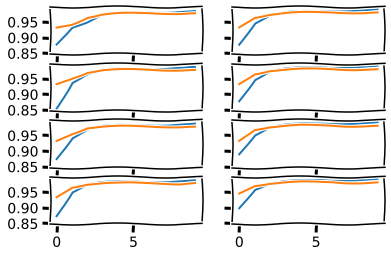

In [17]:
fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12,12))
for i, n in enumerate(n_units):
  axs[i][0].plot(histories['uni_{}'.format(n)].history["acc"])
  axs[i][0].plot(histories['uni_{}'.format(n)].history["val_acc"])
  axs[i][1].plot(histories['bi_{}'.format(n)].history["acc"])
  axs[i][1].plot(histories['bi_{}'.format(n)].history["val_acc"])
plt.show()

**Es interesante ver como en todos los casos, la red bidireccional mejora el desempeño de la LSTM normal, independiente del número de "neuronas". Además, podemos ver que a medida que aumentamos el número de unidades obtenemos mejores resultados hasta que llegamos al último caso en donde da la impresión de que se empieza a ver más overfitting.**

#### 1.h Dimensión del Embedding

Como podrán haber notado, gran parte de los parámetros entrenables se encuentran en el embedding. Elija una de las redes entrenadas anteriormente y varíe la dimensión del embedding en un conjunto de potencias de 2 que le parezca razonable (a lo menos 6 valores). Comente sus observaciones.

In [18]:
models = {}
histories = {}

for n in [2**i for i in range(6, 12)]:
  print("Entrenando red con embedding de tamaño {}.".format(n))
  inputs = Input(shape=(X_train.shape[1],), name='input_uni_{}'.format(n))
  embedd1 = Embedding(input_dim=n_lemmas, output_dim=n, input_length=max_len, name='emb_uni_{}'.format(n))(inputs)
  lstm1 = LSTM(units=64,return_sequences=True, name='lstm_uni_{}'.format(n))(embedd1)
  outputs = Dense(n_tags, activation='softmax', name='out_uni_{}'.format(n))(lstm1)

  models['uni_{}'.format(n)] = Model(inputs=inputs, outputs=outputs)
  models['uni_{}'.format(n)].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  histories['uni_{}'.format(n)] = models['uni_{}'.format(n)].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, callbacks=[stopper])


Entrenando red con embedding de tamaño 64.
Train on 24623 samples, validate on 3588 samples
Epoch 1/10
24623/24623 [==============================] - 23s 920us/sample - loss: 0.7642 - acc: 0.8576 - val_loss: 0.3208 - val_acc: 0.9317
Epoch 2/10
24623/24623 [==============================] - 22s 892us/sample - loss: 0.2372 - acc: 0.9385 - val_loss: 0.1844 - val_acc: 0.9487
Epoch 3/10
24623/24623 [==============================] - 20s 832us/sample - loss: 0.1582 - acc: 0.9580 - val_loss: 0.1303 - val_acc: 0.9680
Epoch 4/10
24623/24623 [==============================] - 21s 858us/sample - loss: 0.1088 - acc: 0.9737 - val_loss: 0.0978 - val_acc: 0.9753
Epoch 5/10
24623/24623 [==============================] - 22s 882us/sample - loss: 0.0845 - acc: 0.9786 - val_loss: 0.0855 - val_acc: 0.9768
Epoch 6/10
24623/24623 [==============================] - 22s 887us/sample - loss: 0.0722 - acc: 0.9807 - val_loss: 0.0793 - val_acc: 0.9777
Epoch 7/10
24623/24623 [==============================] - 21s 

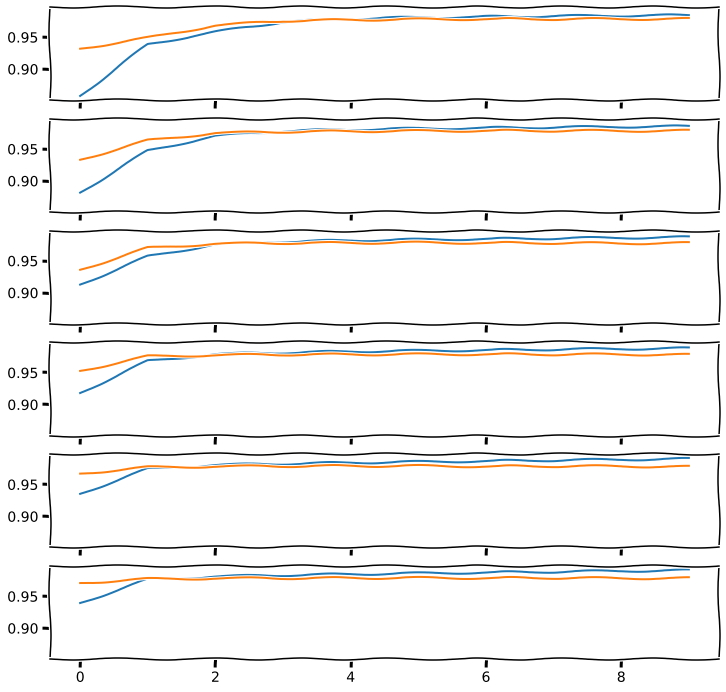

In [22]:
fig, axs = plt.subplots(6, sharex=True, sharey=True, figsize=(12,12))
for i, n in enumerate([2**i for i in range(6, 12)]):
  axs[i].plot(histories['uni_{}'.format(n)].history["acc"])
  axs[i].plot(histories['uni_{}'.format(n)].history["val_acc"])
plt.show()

**No sé si el resultado obtenido era el esperado, pero se puede ver como variar el tamaño del output del embedding no tiene mayor efecto en el desempeño de la red, pero sí afecta al sobreajuste de la red a los datos, aumentando el sobreajuste a mayor tamaño de embedding.**

#### 1.i Escribamos palabras - Datasest

Ahora buscaremos otra aplicación a las redes recurrentes, predecir el caracter siguiente. Si logramos entrenar una red que sea buena en esta tarea, podremos escribir texto automáticamente, pues podemos, a partir de una frase, predecir el caracter siguiente, y luego introducir la nueva frase sin el primer caracter en la red nuevamente, e iterando así escribir automáticamente. Si bien las redes recurrentes son adecuadas para esta tarea, no pretendemos entrenar un _Shakespeare_ en esta tarea, sin embargo es interesante investigar qué tan verosimil o no puede lograr ser el texto generado. 

Para esto, primero crearmos nuestro nuevo dataset. Para esta tarea preferiremos unir todas las frases en un solo gran corpus y luego crear nuevas secuencias semi redundantes. Esto nos evita primero el problema de tener que hacer padding, pues crearemos todas las entradas iguales, pero también nos permite aprovechar mejormente el dataset, de cierta forma aumentando el número de datos. El _target_ en este caso será solo el caracter siguiente correspondiente a cada secuencia. 

En este item debe cargar el dataset, completando el código propuesto abajo. 

In [33]:
df_w = pd.read_csv(os.path.join("drive/My Drive/Colab Notebooks/","entity-annotated-corpus","ner.csv"), engine='python', error_bad_lines=False)

df_w = df_w.dropna()[['word']]

corpus = ' '.join(list(df_w.word.values)).lower()

sentence_length = 40
steps = 5

sentences = []
next_char = []
for i in range(0,len(corpus) - sentence_length - 1 , steps):
    sentences.append(corpus[i:i+sentence_length])
    next_char.append(corpus[i+sentence_length+1])

chars_to_code = {char:code for code, char in enumerate(set(corpus))}
code_to_chars = {code:char for char,code in chars_to_code.items()}

x = pd.np.array([[chars_to_code[char] for char in sentence] for sentence in sentences])
y = to_categorical([chars_to_code[char] for char in next_char])
print(x.shape)
print(y.shape)

Skipping line 281837: Expected 25 fields in line 281837, saw 34


(1213495, 40)
(1213495, 60)


In [34]:
X_train, X_aux, y_train, y_aux = train_test_split(x, y, test_size=0.30) 
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(849446, 40) (849446, 60)
(240273, 40) (240273, 60)
(123776, 40) (123776, 60)


#### 1.j Escribamos palabras - Red

Entrene ahora una red con estos datos utilizando GRU. El resto de la estructura queda a su elección. Evalue el desempeño de su red evaluando qué tan bien genera texto, puede utilizar las funciones propuestas como `callback` para ver como progresa su red. Pruebe a lo menos 2 estructuras distintas. 

Una vez esté satisfecho de su red, hagala escribir algunos textos a partir de textos semilla elegidos por usted. Describa sus observaciones. ¿Qué cree ocurriría si entrenamos la red con otro dataset?

In [0]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import LambdaCallback
import random
import sys

def predict_char(model, sentence):
    x = [chars_to_code[char] for char in sentence]
    x = pad_sequences([x], maxlen=sentence_length, padding='pre', value=0)
    probas = model.predict(x)[0]
    next_index = np.random.choice(len(chars_to_code), p=probas)
    return code_to_chars[next_index]

def on_epoch_end(epoch, logs):
    print(f'\n Generating random text for epoch: {epoch}')
    start_index = random.randint(0,x.shape[0]-1)
    sentence = ''.join([code_to_chars[code] for code in x[start_index]])
    print('\n Generating with seed: ' + sentence)
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_char(character, sentence)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return

print_text_callback = LambdaCallback(on_epoch_end=on_epoch_end)

# . . . 

inputs = Input(shape=X_train.shape[1])
embedd1 = Embedding(input_dim=len(chars_to_code.keys()), output_dim=10, input_length=sentence_length)(inputs)
gru1 = GRU(128)(embedd1)
outputs = Dense(y_train.shape[1], activation='softmax')(gru1)

character = Model(inputs=inputs, outputs=outputs)
character.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
character.fit(X_train, y_train, epochs=35, callbacks=[print_text_callback])

Train on 849446 samples
Epoch 1/35
849440/849446 [============================>.] - ETA: 0s - loss: 2.4236 - acc: 0.3110
 Generating random text for epoch: 0

 Generating with seed:  and consequences of last monday 's car 
 and consequences of last monday 's car o i alasapeglcsans.i adin tatolfn ntigtnfucais sadigisso svdep of ha o adpshmaopto ofh-oaih  offiia  ueoa .tra ia e rnean.a  asie oaeil fae htsbtdr,b.sa  adecokig lceie edttam nwrpige,ae aromdlspcudcee  ist oh riai rvnieair .teephldi rnpol rgusyo a 5wjpod narre hnie ant acuis gvlyz. ofie isaee  ugn xatotss.ssrmnr adenu hsscbr mcssw rsywr a puisastn eal e tis cmvl  sad nwgo aiesmii ssam rybis ustn WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
849446/849446 [==============================] - 1521s 2ms/sample - loss: 2.4236 - acc: 0.3110
Epoch 2/35
849408/849446 [============================>.] - ETA: 0s - loss: 2.1162 - acc: 0.4013
 Generating random tex